<a href="https://colab.research.google.com/github/BrunoASNascimento/bootcamp-datascience-alura/blob/main/course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import folium
from folium.plugins import FastMarkerCluster
from sklearn import preprocessing
import seaborn as sns
from datetime import datetime, date
from calendar import monthrange

In [75]:
SEED=687942

# Pandas options

In [76]:
pd.options.display.float_format = "{:.2f}".format

#procedimentos_sus_internacao_valor_total_ano_mes_processamento

##Read data
This dataset is on GitHub.

Font: https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus/

In [77]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/BrunoASNascimento/bootcamp-datascience-alura/main/data/procedimentos_sus_internacao_valor_total_ano_mes_processamento.csv',
    sep=';',
    skiprows=3,
    skipfooter=12,
    encoding='ISO-8859-1',
    thousands=".",
    decimal=","
)
data.replace('-',np.nan,inplace=True)
data[data.columns[1:]]=data[data.columns[1:]].astype("float")
data

<ipython-input-77-c24b1fb4f1e5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,nan,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,305010883.18
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02,4437115730.71
5,16 Amapá,1120973.34,1268740.33,974651.24,1141137.32,866346.18,1440978.95,1426659.48,1475551.38,1651341.43,...,2296699.42,2333822.65,2310195.65,1842472.54,1705873.64,2065055.35,2009912.57,3249565.87,2942273.94,291637984.75
6,17 Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,...,7210731.09,8096781.90,7022324.92,7209045.59,6390358.03,6697839.73,7384806.71,9131707.60,8240261.38,999998621.85
7,21 Maranhão,10723506.39,13559679.41,13985142.36,14809416.46,14505727.38,14908091.32,15784899.40,15195312.89,14951277.75,...,29445106.74,30003061.50,29680064.33,28779088.94,24792925.68,30512523.70,33099356.79,32936503.37,28587541.78,3632860959.84
8,22 Piauí,7985142.43,10079928.25,10298372.45,10775976.33,10398360.88,10528253.88,11040107.92,10549176.40,10899198.97,...,17641837.23,16229473.38,16851334.11,14568254.23,12224393.97,12658280.69,14547134.38,17871598.61,23210624.20,2130616492.35
9,23 Ceará,15539821.90,25735101.55,28724625.75,30676457.06,30604453.47,31272395.18,30925391.36,27851438.72,30362719.90,...,50834117.85,50622973.33,50719494.87,46991314.91,44964787.45,46197393.28,54409441.05,55180751.48,59808605.59,6197357245.98


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(153), object(1)
memory usage: 32.6+ KB


In [79]:
data.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
2020/Ago     56505034.29
Total      5993731798.30
Length: 153, dtype: float64

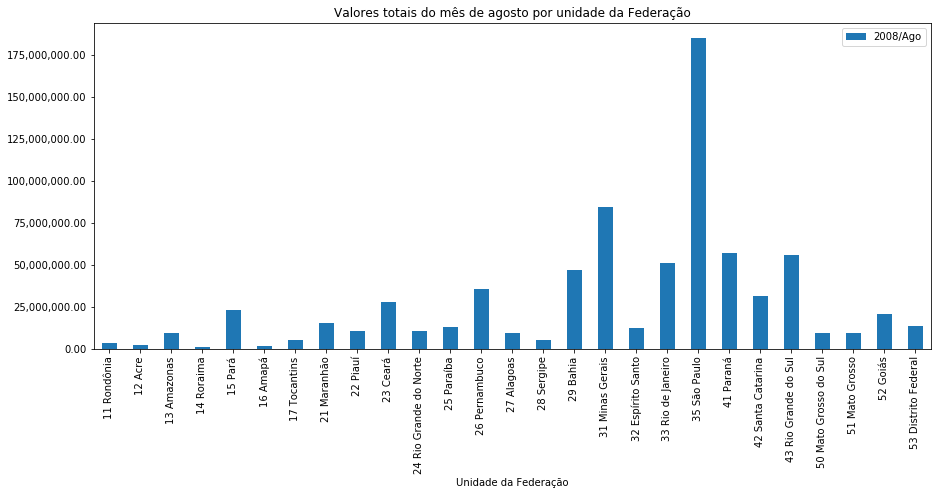

In [80]:
ax = data.plot(x="Unidade da Federação",y="2008/Ago",kind="bar",figsize=(15,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valores totais do mês de agosto por unidade da Federação")
plt.show()

2020/Ago


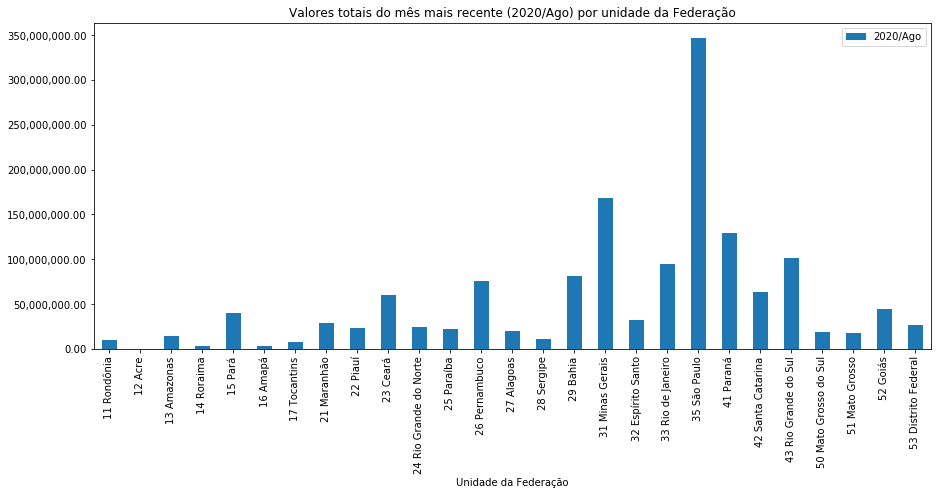

In [81]:
last_date = list(data.columns)[len(data.columns)-2]
print(last_date)
ax = data.plot(x="Unidade da Federação",y="2020/Ago",kind="bar",figsize=(15,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(f"Valores totais do mês mais recente ({last_date}) por unidade da Federação")
plt.show()

#procedimentos_sus_internacao_valor_total_ano_mes_atendimento

##Read data
This dataset is on GitHub.

Font: https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus/

In [82]:
data_atendimento = pd.read_csv(
    'https://raw.githubusercontent.com/BrunoASNascimento/bootcamp-datascience-alura/main/data/procedimentos_sus_internacao_valor_total_ano_mes_atendimento.csv',
    sep=';',
    skiprows=3,
    skipfooter=12,
    encoding='ISO-8859-1',
    thousands=".",
    decimal=","
)
data_atendimento.replace('-',np.nan,inplace=True)
data_atendimento[data_atendimento.columns[1:]]=data_atendimento[data_atendimento.columns[1:]].astype("float")
data_atendimento

<ipython-input-82-2127f1304cb7>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data_atendimento = pd.read_csv(


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,420668039.63
2,13 Amazonas,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71
5,16 Amapá,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37,834187.31,291637984.75
6,17 Tocantins,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,7573064.95,7225320.39,7341171.88,7025821.12,6204453.42,6732370.56,5018138.13,4489665.87,2453362.74,999998621.85
7,21 Maranhão,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,29632234.87,31256187.80,28457299.99,28832662.46,23938156.77,32979447.97,31128144.66,24374205.15,10916718.78,3632860959.84
8,22 Piauí,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,16846903.02,17312889.65,16264613.57,15318975.43,11878587.16,14175053.45,15375523.59,18019214.49,7926321.69,2130616492.35
9,23 Ceará,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,48447583.61,53086389.30,49015303.22,46395356.97,43468816.62,54200339.48,42146555.81,30809221.22,14559529.59,6197357245.98


In [83]:
data_atendimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(279), object(1)
memory usage: 59.2+ KB


In [84]:
data_atendimento.mean()

1992/Mar        40243.16
1992/Abr        11449.99
1993/Mai        34583.77
1993/Dez        68556.52
1994/Jan        39809.34
                ...     
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
2020/Ago     19880851.12
Total      5993724452.01
Length: 279, dtype: float64

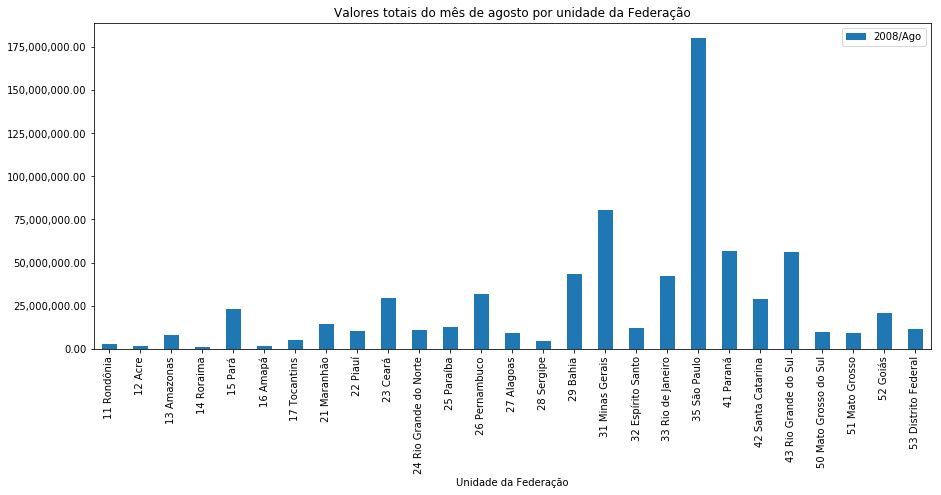

In [85]:
ax = data_atendimento.plot(x="Unidade da Federação",y="2008/Ago",kind="bar",figsize=(15,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valores totais do mês de agosto por unidade da Federação")
plt.show()

2020/Ago


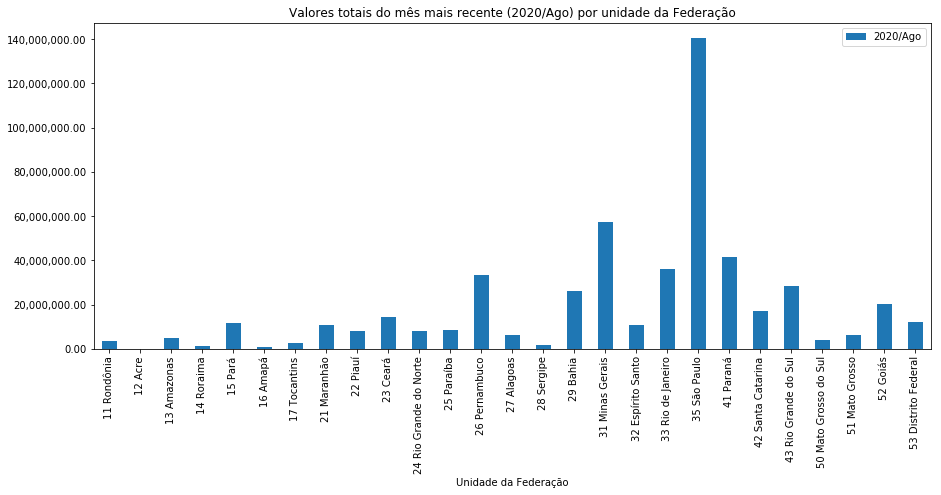

In [86]:
last_date = list(data_atendimento.columns)[len(data_atendimento.columns)-2]
print(last_date)
ax = data_atendimento.plot(x="Unidade da Federação",y="2020/Ago",kind="bar",figsize=(15,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(f"Valores totais do mês mais recente ({last_date}) por unidade da Federação")
plt.show()

In [87]:
usable_columns = data_atendimento.dropna(axis='columns').columns.to_list()[7:]
usable_columns.insert(0,"Unidade da Federação")
usable_data = data_atendimento[usable_columns]
usable_data.head()

,Unidade da Federação,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,305010883.18
4,15 Pará,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4437115730.71


In [88]:
usable_data.set_index("Unidade da Federação",inplace=True)
usable_data.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,305010883.18
15 Pará,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,23537613.41,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4437115730.71


In [89]:
usable_data.drop("Total",axis=1,inplace=True,errors='ignore')
usable_data.head()

C:\Users\bruno\anaconda3\envs\study\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,...,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,...,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,...,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,...,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41
15 Pará,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,23537613.41,...,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51


In [90]:
usable_data.describe()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,23816397.50,25876082.14,26210419.17,26215326.43,26215813.95,27487256.94,26636409.89,27049886.85,28081122.60,27341312.17,...,51035126.81,47560486.81,45776962.72,49365504.99,45084524.48,45236027.39,40005678.92,46769027.82,45367349.74,40717083.95
std,34438026.15,34803780.06,34778272.53,35053393.15,35598113.03,37029076.40,36524519.40,36726417.77,39123815.90,38529429.56,...,65054555.98,60419931.36,58350827.23,63825806.17,57378788.07,58487564.07,52470681.18,61740606.78,60665540.70,56808984.40
min,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,...,2540183.86,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2383895.48,2199920.70,1163813.08
25%,7932273.51,8926011.35,8764559.62,9229049.70,9048298.18,9070623.45,8659787.96,8495575.76,8459479.91,8610319.01,...,16398600.84,14939347.41,14375543.21,15692627.48,14784641.29,14608973.50,11911150.34,14078268.37,14431940.75,12795934.52
50%,10215956.80,12262049.08,12453466.98,11900817.00,11969271.76,12205584.14,12384068.19,12486952.61,12727661.14,12458082.28,...,23085765.53,20350167.95,20135895.21,22201116.15,20512979.08,20936692.02,18123899.78,21437430.22,23479773.03,22233542.26
75%,26932691.98,30400866.02,30982776.89,31299728.93,29228628.94,30644103.88,30505059.15,30714798.99,31507889.25,30652596.86,...,69608126.18,65519297.75,61533541.38,67088405.95,61050699.36,58169318.08,52511861.34,59300190.02,60831524.31,55331317.58
max,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,...,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31


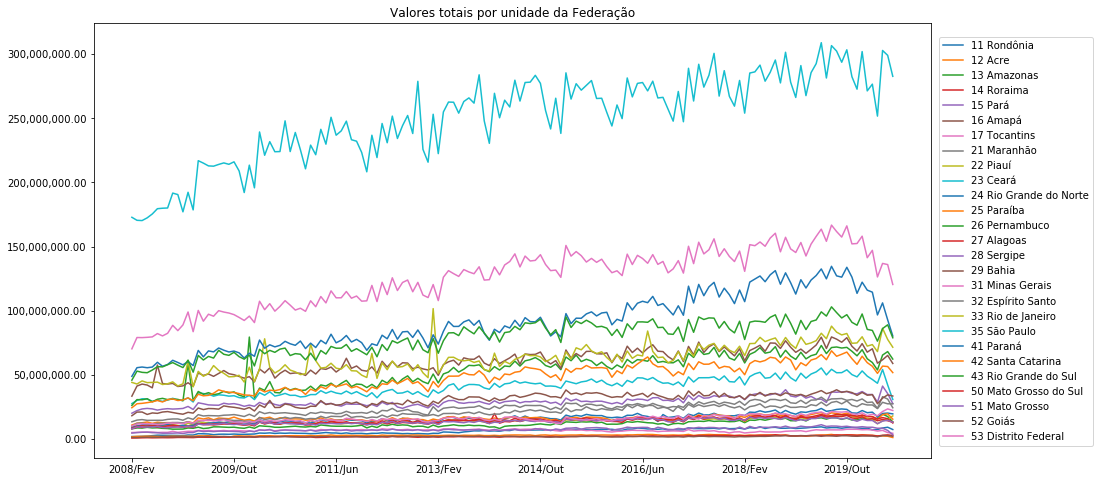

In [91]:
ax =usable_data.T.plot(figsize=(15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(f"Valores totais por unidade da Federação")
plt.legend(loc='upper right',bbox_to_anchor=(1.20, 0.98))
plt.show()

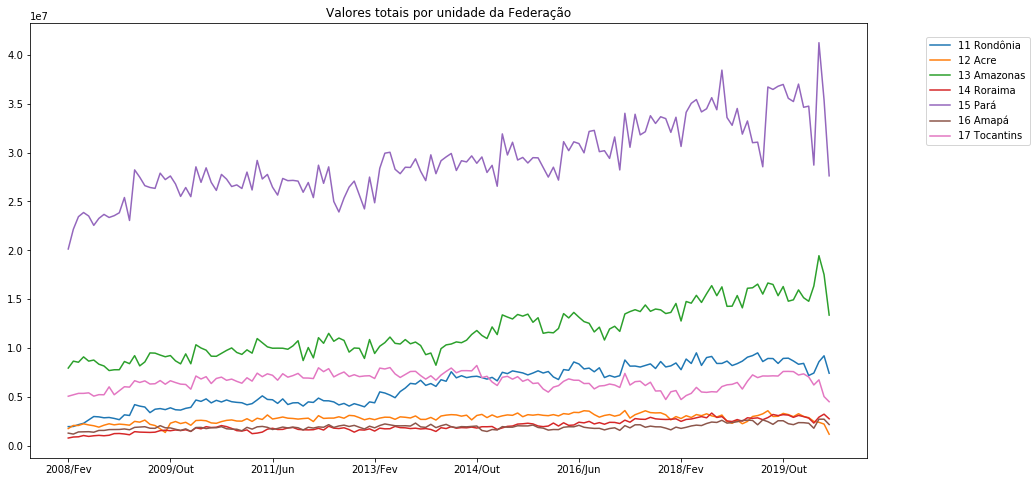

In [92]:
usable_data[:7].T.plot(figsize=(15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(f"Valores totais por unidade da Federação")
plt.legend(loc='upper right',bbox_to_anchor=(1.20, 0.98))
plt.show()

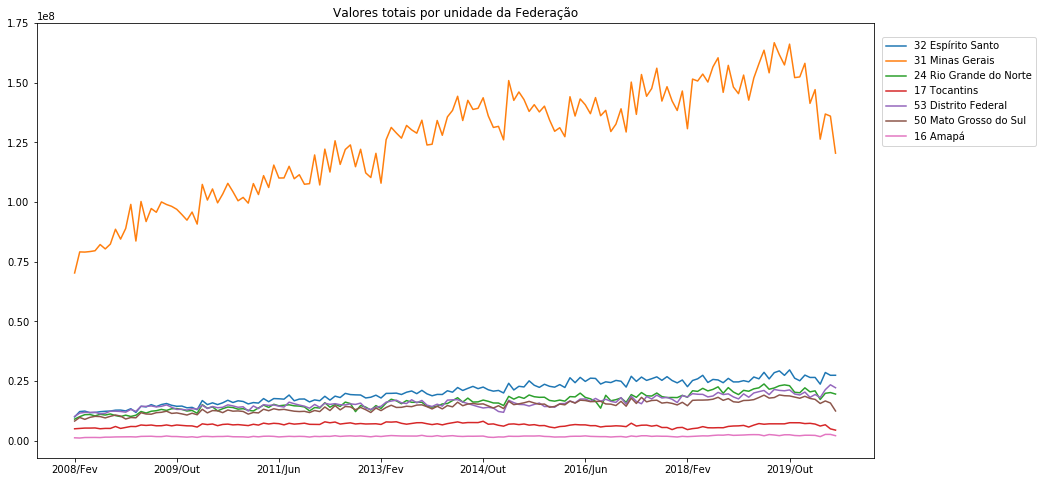

In [93]:
usable_data.sample(n=7,random_state =SEED).T.plot(figsize=(15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(f"Valores totais por unidade da Federação")
plt.legend(loc='upper right',bbox_to_anchor=(1.20, 0.98))
plt.show()

In [94]:
data_info_uf = pd.read_csv(
    'https://raw.githubusercontent.com/BrunoASNascimento/bootcamp-datascience-alura/main/data/uf_estados_lat_lon.csv',
    sep=','    
)
data_info_uf.head()

,codigo_uf,uf,regiao,nome,latitude,longitude
0,11,RO,Norte,Rondônia,-10.83,-63.34
1,12,AC,Norte,Acre,-8.77,-70.55
2,13,AM,Norte,Amazonas,-3.47,-65.10
3,14,RR,Norte,Roraima,1.99,-61.33
4,15,PA,Norte,Pará,-3.79,-52.48


In [95]:
usable_data["uf"] = [ data_info_uf[data_info_uf["codigo_uf"]==int(cod_uf[:2])]['uf'].values[0] for cod_uf in usable_data.index.to_list()]
usable_data["latitude"] = [ data_info_uf[data_info_uf["codigo_uf"]==int(cod_uf[:2])]['latitude'].values[0] for cod_uf in usable_data.index.to_list()]
usable_data["longitude"] = [ data_info_uf[data_info_uf["codigo_uf"]==int(cod_uf[:2])]['longitude'].values[0] for cod_uf in usable_data.index.to_list()]
usable_data["regiao"] = [ data_info_uf[data_info_uf["codigo_uf"]==int(cod_uf[:2])]['regiao'].values[0] for cod_uf in usable_data.index.to_list()]
usable_data.head()

<ipython-input-95-a5a40c8f63ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usable_data["uf"] = [ data_info_uf[data_info_uf["codigo_uf"]==int(cod_uf[:2])]['uf'].values[0] for cod_uf in usable_data.index.to_list()]
<ipython-input-95-a5a40c8f63ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usable_data["latitude"] = [ data_info_uf[data_info_uf["codigo_uf"]==int(cod_uf[:2])]['latitude'].values[0] for cod_uf in usable_data.index.to_list()]
<ipython-input-95-a5a40c8f63ce>:3: SettingWithCopyWarning: 
A 

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,uf,latitude,longitude,regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,...,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,RO,-10.83,-63.34,Norte
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,...,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,AC,-8.77,-70.55,Norte
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,...,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,AM,-3.47,-65.10,Norte
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,...,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,RR,1.99,-61.33,Norte
15 Pará,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,23537613.41,...,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,PA,-3.79,-52.48,Norte


In [96]:
usable_data["Total"] = usable_data.sum(axis=1)
usable_data

<ipython-input-96-4d951ebc18de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usable_data["Total"] = usable_data.sum(axis=1)


,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,uf,latitude,longitude,regiao,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,...,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,RO,-10.83,-63.34,Norte,922530117.20
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,...,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,AC,-8.77,-70.55,Norte,417753323.20
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,...,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,AM,-3.47,-65.10,Norte,1747039149.00
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,...,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,RR,1.99,-61.33,Norte,301776981.57
15 Pará,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,23537613.41,...,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,PA,-3.79,-52.48,Norte,4382999318.74
16 Amapá,1275063.72,1177745.93,1396371.51,1411520.77,1420892.01,1367235.47,1550340.63,1550166.99,1635676.50,1647903.31,...,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37,AP,1.41,-51.77,Norte,288124217.67
17 Tocantins,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,...,7025821.12,6204453.42,6732370.56,5018138.13,4489665.87,TO,-9.46,-48.26,Norte,987855372.78
21 Maranhão,13452263.93,14750895.33,15148647.11,14543679.92,14553978.06,14536700.20,14609872.57,15317881.85,15617699.59,15643973.86,...,28832662.46,23938156.77,32979447.97,31128144.66,24374205.15,MA,-5.42,-45.44,Nordeste,3583485070.44
22 Piauí,9711680.20,10428191.09,10227943.00,10562148.66,10465088.93,10618079.70,10645917.52,11037940.55,11143375.71,10583049.66,...,15318975.43,11878587.16,14175053.45,15375523.59,18019214.49,PI,-6.60,-42.28,Nordeste,2102312491.19


In [97]:
x = usable_data[["Total"]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
usable_data["Total_normalizado"] =x_scaled
usable_data.head()

<ipython-input-97-84887ed107e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usable_data["Total_normalizado"] =x_scaled


,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Abr,2020/Mai,2020/Jun,2020/Jul,uf,latitude,longitude,regiao,Total,Total_normalizado
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,...,7423678.64,8581195.13,9193593.76,7407388.24,RO,-10.83,-63.34,Norte,922530117.20,0.02
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,...,2472063.08,2383895.48,2199920.70,1163813.08,AC,-8.77,-70.55,Norte,417753323.20,0.00
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,...,16330913.81,19441150.53,17509334.66,13358514.02,AM,-3.47,-65.10,Norte,1747039149.00,0.04
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,...,2304961.42,2910776.44,3216466.51,2739498.41,RR,1.99,-61.33,Norte,301776981.57,0.00
15 Pará,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,23537613.41,...,28714969.96,41248502.78,35396030.78,27618727.51,PA,-3.79,-52.48,Norte,4382999318.74,0.11


In [98]:
folium_map = folium.Map(location=[-14, -45],
                        zoom_start=4,
                        tiles='CartoDB dark_matter')
for index, row in usable_data.iterrows():
    print(row["latitude"])

    folium.CircleMarker(
    location=[row["latitude"], row["longitude"]],
    radius=20*row["Total_normalizado"],
    popup=index,
    color='#fff',
    fill=True,
    fill_color='#fff'
).add_to(folium_map)
folium_map

-10.83
-8.77
-3.47
1.99
-3.79
1.41
-9.46
-5.42
-6.6
-5.2
-5.81
-7.28
-8.38
-9.62
-10.57
-13.29
-18.1
-19.19
-22.25
-22.19
-24.89
-27.45
-30.17
-20.51
-12.64
-15.98
-15.83


['35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul', '33 Rio de Janeiro', '23 Ceará']


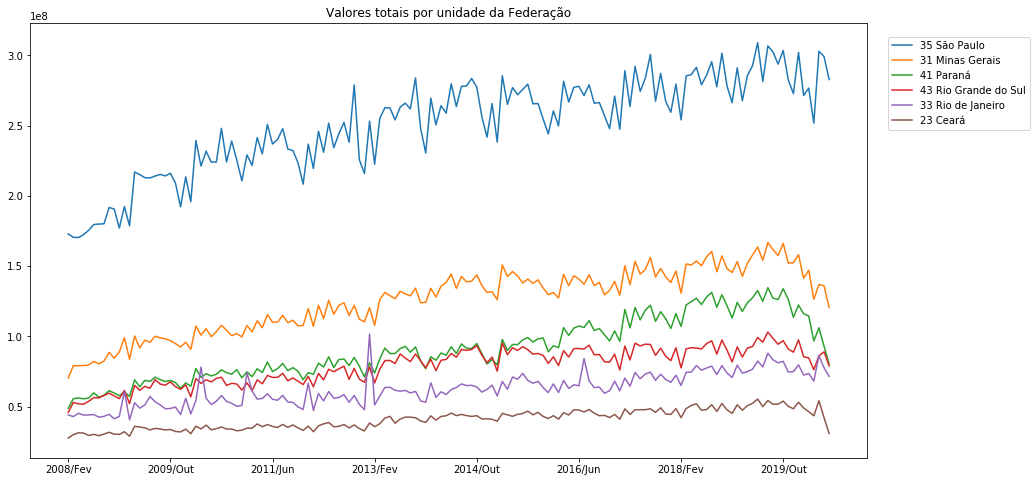

In [99]:
data_state_plot = usable_data.sort_values(by="Total",ascending=False).drop(["uf",	"latitude",	"longitude","regiao","Total",	"Total_normalizado"],axis=1,errors='ignore')
states_to_plot = usable_data.sort_values(by="Total",ascending=False).drop(["uf",	"latitude",	"longitude","regiao","Total",	"Total_normalizado"],axis=1,errors='ignore')[:5].T.columns.to_list()
states_to_plot.insert(6,"23 Ceará")
print(states_to_plot)
data_state_plot.loc[states_to_plot].T.plot(figsize=(15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(f"Valores totais por unidade da Federação")
plt.legend(loc='upper right',bbox_to_anchor=(1.20, 0.98))
plt.show()

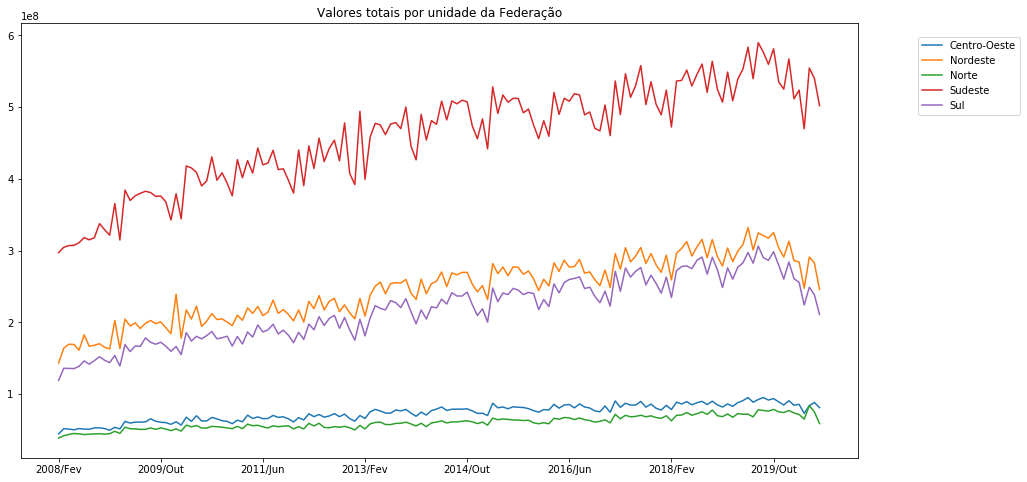

In [100]:
list_dates = usable_data.columns.to_list()[:len(usable_data.columns.to_list())-6]
usable_data.groupby(['regiao']).sum()[list_dates].T.plot(figsize=(15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(f"Valores totais por unidade da Federação")
plt.legend(loc='upper right',bbox_to_anchor=(1.20, 0.98))
plt.show()


In [101]:
last_month  = usable_data.columns.to_list()[-7]
usable_data_proportional = (usable_data[last_month].sort_values(ascending=False)/ usable_data.loc["35 São Paulo"][last_month])
usable_data_proportional

Unidade da Federação
35 São Paulo             1.00
31 Minas Gerais          0.43
41 Paraná                0.28
43 Rio Grande do Sul     0.28
33 Rio de Janeiro        0.25
26 Pernambuco            0.22
29 Bahia                 0.21
42 Santa Catarina        0.18
52 Goiás                 0.12
23 Ceará                 0.11
15 Pará                  0.10
32 Espírito Santo        0.10
21 Maranhão              0.09
53 Distrito Federal      0.08
24 Rio Grande do Norte   0.07
22 Piauí                 0.06
25 Paraíba               0.05
13 Amazonas              0.05
27 Alagoas               0.05
51 Mato Grosso           0.05
50 Mato Grosso do Sul    0.04
11 Rondônia              0.03
17 Tocantins             0.02
28 Sergipe               0.01
14 Roraima               0.01
16 Amapá                 0.01
12 Acre                  0.00
Name: 2020/Jul, dtype: float64

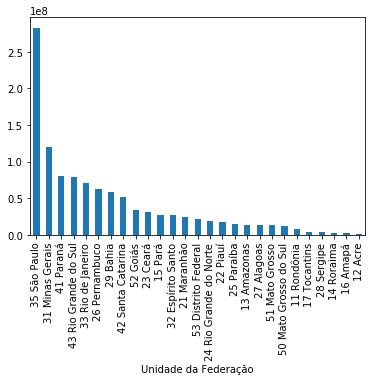

In [102]:
usable_data[last_month].sort_values(ascending=False).plot(kind="bar")

In [103]:
usable_proportional = (usable_data[last_month].sort_values(ascending=False)/ usable_data[last_month].sum())
usable_proportional

Unidade da Federação
35 São Paulo             0.26
31 Minas Gerais          0.11
41 Paraná                0.07
43 Rio Grande do Sul     0.07
33 Rio de Janeiro        0.07
26 Pernambuco            0.06
29 Bahia                 0.05
42 Santa Catarina        0.05
52 Goiás                 0.03
23 Ceará                 0.03
15 Pará                  0.03
32 Espírito Santo        0.02
21 Maranhão              0.02
53 Distrito Federal      0.02
24 Rio Grande do Norte   0.02
22 Piauí                 0.02
25 Paraíba               0.01
13 Amazonas              0.01
27 Alagoas               0.01
51 Mato Grosso           0.01
50 Mato Grosso do Sul    0.01
11 Rondônia              0.01
17 Tocantins             0.00
28 Sergipe               0.00
14 Roraima               0.00
16 Amapá                 0.00
12 Acre                  0.00
Name: 2020/Jul, dtype: float64

In [104]:
ibge_forecast = pd.read_excel('https://github.com/BrunoASNascimento/bootcamp-datascience-alura/raw/main/data/populacao_estimada_ibge_2020.xls')
ibge_forecast.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,nan,POPULAÇÃO ESTIMADA
1,Brasil,nan,211755692
2,Região Norte,nan,18672591
3,Rondônia,nan,1796460
4,Acre,nan,894470


In [113]:
population_wikipedia='''Posição	Unidade federativa	População	% da pop. total	País comparável (habitantes)
1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)'''

In [114]:
from io import StringIO

data_population_io= StringIO(population_wikipedia)

population = pd.read_csv(data_population_io,sep='\t')
population.rename(columns={'Unidade federativa':'uf','População':'populacao'},inplace=True)
population['populacao'] = population['populacao'].str.replace(' ','').astype('int64')
population = population[['uf','populacao']].set_index('uf')
population.index=population.index.str.strip()
population.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [118]:
# usable_data.index = usable_data.index.str[3:]
usable_data.index = usable_data.index.str.strip()
population_with_spending = population.join(usable_data[last_month])
population_with_spending.head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,282709570.31
Minas Gerais,21292666,120467187.34
Rio de Janeiro,17366189,71540227.33
Bahia,14930634,58898100.40
Paraná,11516840,80320852.69


In [120]:
population_with_spending['spending_per_population'] = population_with_spending[last_month]/population_with_spending['populacao']
population_with_spending.head()

,populacao,2020/Jul,spending_per_population
uf,,,
São Paulo,46289333,282709570.31,6.11
Minas Gerais,21292666,120467187.34,5.66
Rio de Janeiro,17366189,71540227.33,4.12
Bahia,14930634,58898100.40,3.94
Paraná,11516840,80320852.69,6.97


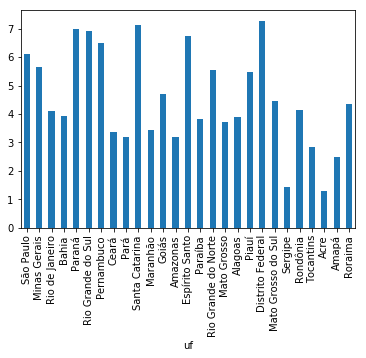

In [124]:
population_with_spending['spending_per_population'].plot(kind='bar')

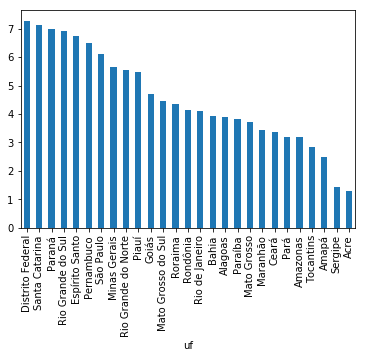

In [123]:
population_with_spending['spending_per_population'].sort_values(ascending=False).plot(kind='bar')

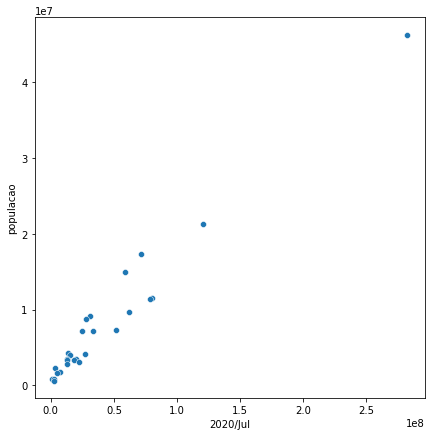

In [128]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=population_with_spending,x=last_month,y='populacao')

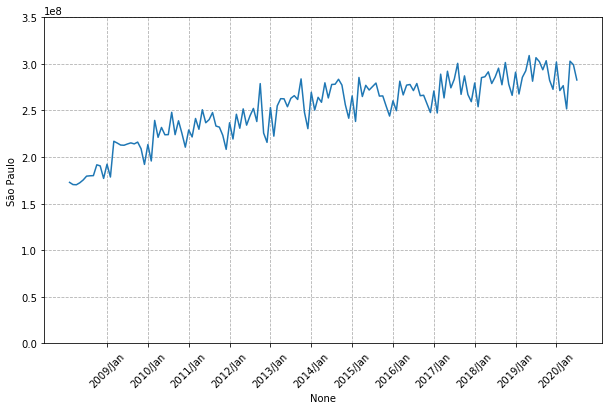

In [165]:
monthly = usable_data[usable_data.columns[:-6]].T
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=monthly, x=monthly.index, y='São Paulo')
plt.xticks(rotation=45)
plt.ylim(0,350*1000000)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11))
plt.grid(True,linestyle='--')
plt.show()

In [173]:
def to_day(month_year):
    months_dict={
        'Jan':1,
        'Fev':2,
        'Mar':3,
        'Abr':4,
        'Mai':5,
        'Jun':6,
        'Jul':7,
        'Ago':8,
        'Set':9,
        'Out':10,
        'Nov':11,
        'Dez':12
    }
    month_info = month_year.split('/')
    return date(int(month_info[0]),months_dict[month_info[1]],1)


monthly.index = monthly.index.map(to_day)
monthly.head()

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2008-02-01,1940792.63,1743978.66,7934652.10,771687.83,20126081.01,1275063.72,5051932.07,13452263.93,9711680.20,27643304.86,...,10032886.43,44122593.19,172834914.73,48855046.46,24409572.92,45897704.82,8279288.79,7929894.93,18149374.27,10215956.80
2008-03-01,1955721.68,2057439.02,8641517.13,876091.18,22149375.82,1177745.93,5200151.87,14750895.33,10428191.09,30085370.22,...,12262049.08,42892665.52,170481849.56,55611791.07,27483480.50,52928695.92,9793888.78,9416367.68,20992213.03,11627918.26
2008-04-01,2143353.81,2057829.69,8531576.49,896952.53,23436682.75,1396371.51,5343714.73,15148647.11,10227943.00,31376221.00,...,12453466.98,45295962.86,170278285.95,56115135.82,27806641.44,51972416.77,8997542.75,9390588.03,21049477.30,11922015.36
2008-05-01,2280382.58,2226577.93,9079902.15,1027288.73,23861080.80,1411520.77,5344487.99,14543679.92,10562148.66,31189904.62,...,11789786.09,43951349.46,172402180.59,55574831.93,28354279.52,51679350.79,9842108.59,9378197.25,19162546.79,11900817.00
2008-06-01,2624542.97,2112576.82,8646295.77,938293.54,23502915.90,1420892.01,5398413.09,14553978.06,10465088.93,29463965.11,...,11889687.35,44102925.77,175416595.83,56094754.74,28993292.76,53759674.01,10257782.00,9450300.60,20332533.92,11969271.76


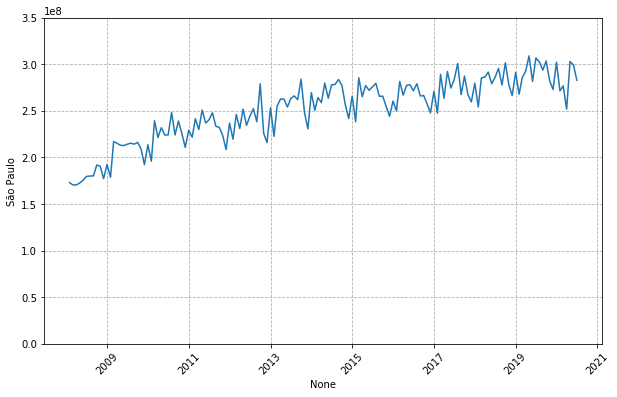

In [174]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=monthly, x=monthly.index, y='São Paulo')
plt.xticks(rotation=45)
plt.ylim(0,350*1000000)
plt.grid(True,linestyle='--')
plt.show()

In [184]:
monthly_melt = monthly.reset_index().melt(id_vars=['index'], value_vars=monthly.columns)
monthly_melt.columns = ['data','uf','gasto']
monthly_melt['data'] = pd.to_datetime(monthly_melt['data'])
monthly_melt.head()

,data,uf,gasto
0,2008-02-01,Rondônia,1940792.63
1,2008-03-01,Rondônia,1955721.68
2,2008-04-01,Rondônia,2143353.81
3,2008-05-01,Rondônia,2280382.58
4,2008-06-01,Rondônia,2624542.97


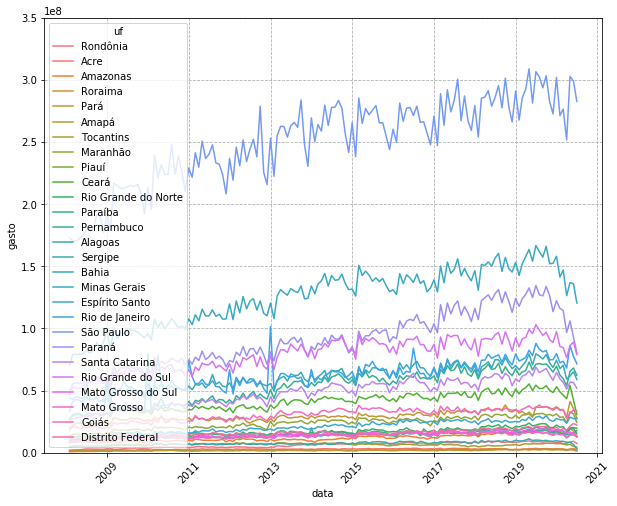

In [185]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=monthly_melt, x='data', y='gasto',hue='uf')
plt.xticks(rotation=45)
plt.ylim(0,350*1000000)
plt.grid(True,linestyle='--')
plt.show()

In [216]:
monthly_melt['ano'] = monthly_melt['data'].dt.year
monthly_melt['mes'] = monthly_melt['data'].dt.month
monthly_melt['dias_no_mes'] = monthly_melt['data'].dt.daysinmonth
monthly_melt['gasto_diario'] = monthly_melt['gasto']/monthly_melt['dias_no_mes']
monthly_melt.head()

,data,uf,gasto,ano,mes,dias_no_mes,gasto_diario
0,2008-02-01,Rondônia,1940792.63,2008,2,29,66923.88
1,2008-03-01,Rondônia,1955721.68,2008,3,31,63087.80
2,2008-04-01,Rondônia,2143353.81,2008,4,30,71445.13
3,2008-05-01,Rondônia,2280382.58,2008,5,31,73560.73
4,2008-06-01,Rondônia,2624542.97,2008,6,30,87484.77


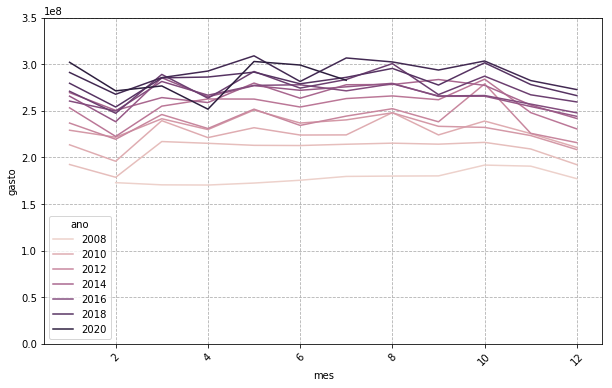

In [217]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=monthly_melt.query('uf == "São Paulo"'), x='mes', y='gasto',hue='ano')
plt.xticks(rotation=45)
plt.ylim(0,350*1000000)
plt.grid(True,linestyle='--')
plt.show()

In [224]:
import math
def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

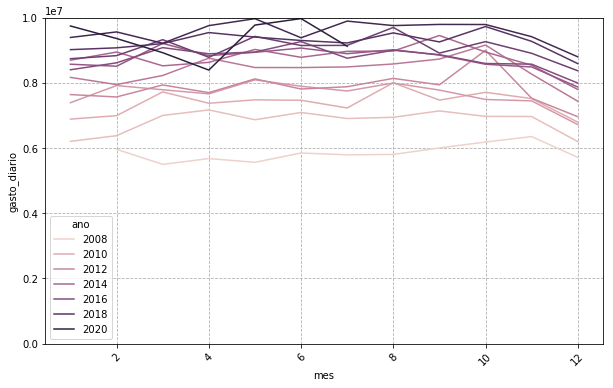

In [237]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=monthly_melt.query('uf == "São Paulo"'), x='mes', y='gasto_diario',hue='ano')
plt.xticks(rotation=45)
plt.ylim(0,round_up(monthly_melt.query('uf == "São Paulo"')['gasto_diario'].max(),-6))
plt.grid(True,linestyle='--')
plt.show()

In [245]:
spending_per_year = monthly_melt.query('uf == "São Paulo"')
spending_per_year = spending_per_year.groupby('ano')[['gasto','dias_no_mes']].sum()
spending_per_year['gasto_diario'] = spending_per_year['gasto']/spending_per_year['dias_no_mes']
spending_per_year.head()

,gasto,dias_no_mes,gasto_diario
ano,,,
2008,1960230442.26,335,5851434.16
2009,2489030484.83,365,6819261.60
2010,2696622949.86,365,7388008.08
2011,2794549339.77,365,7656299.56
2012,2873973262.98,366,7852385.96


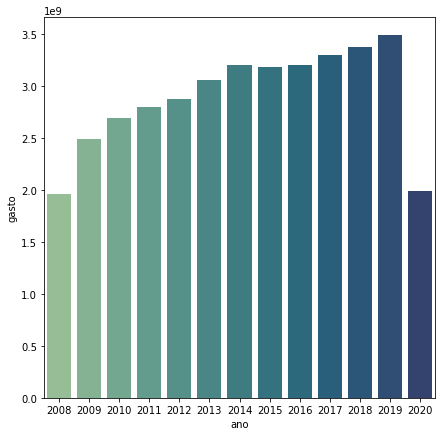

In [264]:
plt.figure(figsize=(7,7))
sns.barplot(data=spending_per_year,x=spending_per_year.index,y='gasto',palette='crest',)
# sns.color_palette("crest", as_cmap=True)

In [270]:
states = ['São Paulo', 'Minas Gerais', 'Pernambuco']
spending_per_state = monthly_melt.query('uf in @states').groupby(['uf','ano'],as_index=False)[['gasto','dias_no_mes']].sum()
spending_per_state['gasto_diario'] = spending_per_state['gasto']/spending_per_state['dias_no_mes']
spending_per_state.head()

,uf,ano,gasto,dias_no_mes,gasto_diario
0,Minas Gerais,2008,894346731.42,335,2669691.74
1,Minas Gerais,2009,1149141349.15,365,3148332.46
2,Minas Gerais,2010,1217493124.37,365,3335597.60
3,Minas Gerais,2011,1315021864.36,365,3602799.63
4,Minas Gerais,2012,1408354148.98,366,3847962.16


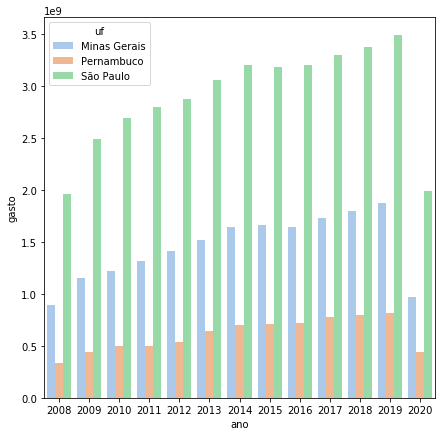

In [271]:
plt.figure(figsize=(7,7))
sns.barplot(data=spending_per_state,x='ano',y='gasto',hue='uf')

<Figure size 720x504 with 0 Axes>

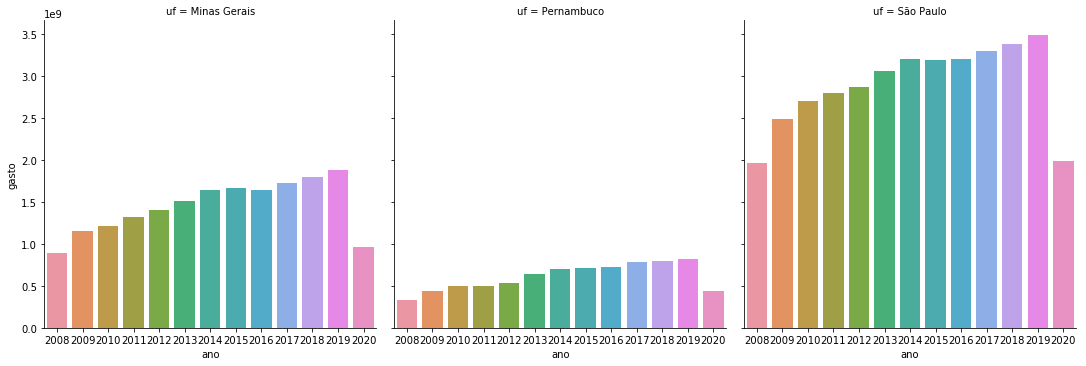

In [273]:
plt.figure(figsize=(10,7))
sns.catplot(data=spending_per_state,x='ano',y='gasto',kind='bar',col='uf')